In [1]:
import geopandas as gpd
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**CONTENIDO**

- Cargar data CS
- Resultados Complejos observables en CS
- Procesamiento para datasets geograficos
    - Mapas Ejemplo (Base Personas)
    - Comandos Mapbox CLI

# Cargar data CS

### Precios Corrientes

In [2]:
# from datetime import datetime
# # hoy = datetime.today().strftime('%Y-%m-%d')

# cpi = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
# cpi.index = pd.to_datetime(cpi.index)


# hoy = datetime.today().strftime('%Y-%m')

# # Ratio de precios de hoy con respecto a precios con indice en base modelo
# ix = cpi.loc[hoy]['index'].values[0]/cpi.loc['2016-01']['index'].values[0]
# # ix = cpi.loc['2020-09-30'].values[0]/cpi.loc['2016-01-01'].values[0] # Precios del periodo en estudio

# columnas_pesos =  ['P47T_persona', 'P47T_hogar', 'CBA', 'gap_indigencia', 'CBT', 'gap_pobreza']

### Leer data CS

In [3]:
# data = pd.read_csv('/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.02_ARGCSactual.csv', encoding_errors='ignore')

# ## Deflacta a precios actuales
# data[columnas_pesos] = ix*data[columnas_pesos]

### Unir NOMDPTO y Region

In [4]:
frac = 0.02
# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2020.csv')
# /media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_2021-2022.csv saved

radio_ref = pd.read_csv('./../data/info/radio_ref.csv')
radio_ref['COD_2010'] = radio_ref['radio'].astype(str).str.zfill(9)
dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
radio_ref = radio_ref[['RADIO_REF_ID', 'COD_2010', 'NOMDPTO', 'AGLOMERADO', 'Region']].drop_duplicates().merge(aglo_labels)

In [5]:

# data = data.merge(radio_ref, on = ['RADIO_REF_ID', 'AGLOMERADO'])
# data['AGLO_si'] = data.AGLOMERADO != 0

# Resultados Complejos observables en CS

In [6]:
# table = 100*data.groupby('NOMAGLO')[['Pobreza', 'Indigencia']].mean().round(3)
# table.sort_values('Indigencia')

# Procesamiento para datasets geograficos

### Synthetizer functions

In [7]:
# ### Sintetizadores
# import datetime as dt
# import numpy as np

# ## Base Personas
# def sintetizar_P(data, grouper, frac = 0.02):
#     df = data.copy()
#     df['Total'] = True
#     df['timestamp'] = dt.datetime.today()
#     n_Qs = df.Q.nunique()
    
# #     # Funciones percentil
# #     percentiles = [.10, .25, .75, .9, .2]
# #     quantile_funcs = [(p, lambda x: x.quantile(p)) for p in percentiles]

#     df = df.groupby(grouper + ['timestamp'])[['Total', 'Pobreza', 'Indigencia','P47T_persona'#, 'Pobreza_5usd'
#                                              ]].agg(
#         {'Total': ['mean', 'sum'], 'Pobreza': ['mean', 'sum'], 'Indigencia': ['mean', 'sum'], #'Pobreza_5usd': ['mean', 'sum'], 
#          'P47T_persona':['mean', q10, q25, 'median', q75, q90]})
    
#     df[[('Total', 'sum')]] = (df[[('Total', 'sum')]]/frac).round(1)#.astype(int)
#     df[[('Pobreza', 'sum')]] = (df[[('Pobreza', 'sum')]]/frac).round(1)#.astype(int)
#     df[[('Indigencia', 'sum')]] = (df[[('Indigencia', 'sum')]]/frac).round(1)#.astype(int)
# #     df[[('Pobreza_5usd', 'sum')]] = (df[[('Pobreza_5usd', 'sum')]]/frac).round(1)#.astype(int)
#     df[[('Total', 'mean')]] = df[[('Total', 'mean')]].round(4)
#     df[[('Indigencia', 'mean')]] = df[[('Indigencia', 'mean')]].round(4)
#     df[[('Pobreza', 'mean')]] = df[[('Pobreza', 'mean')]].round(4)
# #     df[[('Pobreza_5usd', 'mean')]] = df[[('Pobreza_5usd', 'mean')]].round(4)
    
#     df['P47T_persona'] = df['P47T_persona'].round(-1).astype(int)
    
#     dfB = df.T.set_index(np.repeat('Personas', df.shape[1]), append=True)
       
# #     dfB = dfB.stack().stack().stack().reset_index()
#     stacker_ix = [-i for i in range(len(grouper) + 1)]
#     dfB = dfB.stack(level = stacker_ix).reset_index()
    
#     dfB = dfB.rename(columns = {'level_0': 'observable', 'level_1': 'sintetico', 'level_2': 'base', 0: 'valor'})
#     dfB['valor'] = dfB['valor'].astype(float)
#     return dfB

# def sintetizar_H(data, grouper, frac = 0.02):
#     df = data.copy()
#     df = df.groupby('HOGAR_REF_ID').first()
#     df['Total'] = True
#     df['timestamp'] = dt.datetime.today()
#     n_Qs = df.Q.nunique()

# #     # Funciones percentil
# #     percentiles = [.10, .25, .75, .9, .2]
# #     quantile_funcs = [(p, lambda x: x.quantile(p)) for p in percentiles]

#     df = df.groupby(grouper + ['timestamp'])[['Total', 'Pobreza', 'Indigencia', 'P47T_hogar', 'CB_EQUIV', 'CBA', #'Pobreza_5usd',
#                                               'gap_indigencia', 'CBT', 'gap_pobreza']
#                             ].agg(
#     {'Total': ['mean', 'sum'], 'Pobreza': ['mean', 'sum'], 'Indigencia': ['mean', 'sum'], #'Pobreza_5usd': ['mean', 'sum'], 
#      'P47T_hogar': ['mean', q10, q25, 'median', q75, q90],
#      'CB_EQUIV': ['mean', 'median'],     
#      'CBA': ['sum', 'median'], 'gap_indigencia': ['mean', 'median'], 
#      'CBT': ['sum', 'median'], 'gap_pobreza': ['mean', 'median']})
        
#     df[[('Total', 'sum')]] = (df[[('Total', 'sum')]]/frac/n_Qs).round(1)#.astype(int)
#     df[[('Pobreza', 'sum')]] = (df[[('Pobreza', 'sum')]]/frac/n_Qs).round(1)#.astype(int)
#     df[[('Indigencia', 'sum')]] = (df[[('Indigencia', 'sum')]]/frac/n_Qs).round(1)#.astype(int)
# #     df[[('Pobreza_5usd', 'sum')]] = (df[[('Pobreza_5usd', 'sum')]]/frac).round(1)#.astype(int)
#     df[[('Total', 'mean')]] = df[[('Total', 'mean')]].round(4)
#     df[[('Pobreza', 'mean')]] = df[[('Pobreza', 'mean')]].round(4)
#     df[[('Indigencia', 'mean')]] = df[[('Indigencia', 'mean')]].round(4)
# #     df[[('Pobreza_5usd', 'mean')]] = (df[[('Pobreza_5usd', 'mean')]]/frac).round(1)#.astype(int)

#     df['CB_EQUIV'] = df['CB_EQUIV'].round(4)
    
#     df['P47T_hogar'] = df['P47T_hogar'].round(-1).astype(int)
#     df['CBA'] = df['CBA'].round(-1).astype(int)
#     df['gap_indigencia'] = df['gap_indigencia'].round(-1).astype(int)
#     df['CBT'] = df['CBT'].round(-1).astype(int)
#     df['gap_pobreza'] = df['gap_pobreza'].round(-1).astype(int)
    
#     dfC = df.T.set_index(np.repeat('Hogares', df.shape[1]), append=True)
#     dfC.index.names = ['observable', 'sintetico', 'base']
    
# #     FrozenList(['observable', 'sintetico', 'base', 'timestamp', 'AGLOMERADO', 'Region', 'Q'])
    
# # #     dfC = dfC.stack().stack().stack().reset_index()
#     stacker_ix = [-i for i in range(len(grouper) + 1)]
#     dfC = dfC.stack(level = stacker_ix).reset_index()
# #     # es como df.stack([-1, -2, -3, -4]) pero se adapta a groupers mas o menos largos
# #     dfC = dfC.stack(stacker_ix).reset_index()

#     dfC = dfC.rename(columns = {'level_0': 'observable', 'level_1': 'sintetico', 'level_2': 'base', 0: 'valor'})
#     dfC['valor'] = dfC['valor'].astype(float)
#     return dfC

# # Percentile funcs
# def q10(x):
#     return x.quantile(0.1)

# def q25(x):
#     return x.quantile(0.25)

# def q75(x):
#     return x.quantile(0.75)

# def q90(x):
#     return x.quantile(0.9)

In [8]:
# x = sintetizar_P(data, ['PROV'], frac = 0.02)
# x.groupby(['observable','sintetico','base']).size()

In [9]:
# sintetizar_H(data, ['PROV'], frac = 0.02).groupby(['observable','sintetico','base']).size()

In [10]:
# # Ej. Personas en pobreza
# # df = sintetizar_P(data, ['PROV'], frac = 0.02)
# # df.loc[df.sintetico == 'sum'].groupby('observable')['valor'].sum() 

# Indigencia     6500687.5
# Pobreza       21147900.0
# Total         44603650.0

## Los niveles geograficos disponibles son:
 - Radios (RADIO_REF_ID)
 - Fracciones (IDFRAC, no es clave unica)
 - Dptos (DPTO)
 - Provs (PROV)
 - Aglos (AGLOMERADO)
 - (Region)

### Cargar geometrias

In [11]:
## RADIO REF. Referencia de radios censales segun Censo 2010

# radio_ref = pd.read_csv('./radio_ref.csv')
# radio_ref['DPTO'] = radio_ref['DPTO'].astype(int)
# radio_ref['COD_2010'] = radio_ref['radio'].astype(str).str.zfill(9)

## POLIGONOS
# admin410_f = './../../IGN_INDEC_georef/censos_shp_CONICET/2010_RADIOS ARGENTINA'
admin310_f = './../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/fracs_2010.shp'
admin210_f = './../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/dptos_2010.shp'
admin1_f = './../../IGN_INDEC_georef/IGN_shp/Provincia/'

## Provincias del IGN
admin1 = gpd.read_file(admin1_f)  # COD_2010 = '020130302'
# admin1['ID'] = admin1.IN1 + '0000000'
admin1['PROV'] = admin1.IN1.astype(int)
admin1 = admin1[['PROV', 'geometry']]

### Poligonos de censo de CONICET.
# admin410 = gpd.read_file(admin410_f)  # COD_2010 = '020130302'
# admin410['ID'] = admin410['COD_2010']

admin310 = gpd.read_file(admin310_f)  
admin310['IDFRAC'] = admin310.PROV_ + admin310.DEPTO_ + admin310.FRACC_ + '00'
admin310 = admin310[['IDFRAC', 'geometry']]

admin210 = gpd.read_file(admin210_f) 
# admin210['ID'] = admin210.PROV_ + admin210.DEPTO_ + '0000'
admin210['DPTO'] = (admin210['PROV_'] + admin210['DEPTO_']).astype(int)
admin210 = admin210[['DPTO', 'geometry']]


## ADOPTAR CRS del IGN
admin210 = admin210.to_crs(admin1.crs)
admin310 = admin310.to_crs(admin1.crs)

In [12]:
admin1['area_km2'] = admin1['geometry'].to_crs('epsg:3395').map(lambda p: p.area / 10**6)
admin210['area_km2'] = admin210['geometry'].to_crs('epsg:3395').map(lambda p: p.area / 10**6)
admin310['area_km2'] = admin310['geometry'].to_crs('epsg:3395').map(lambda p: p.area / 10**6)

### Funcion guardar geojson

In [13]:
# import os
# pip install geopandas
import geopandas as gpd


# def save_geojson(gdf, filename = 'test.geojson'):
#     if not os.path.exists('./../data/geojson/'):
#         os.makedirs('./../data/geojson/')
    
#     try:    # Delete if geojson exists, cause overwriting is not supported
#         os.remove('./../data/geojson/'+filename)
#     except OSError:
#         pass
    
#     gdf.to_file('./../data/geojson/'+filename, driver="GeoJSON", encoding='utf-8')


In [14]:
# # Las variables agrupadoras pueden ser: 
# groupers = [['Q','Total_pais'], ['Q','AGLOMERADO'], ['Q','Region'], 
#             ['Q','PROV'], ['Q','DPTO']]

## Base: Personas

In [15]:
# ## PROVINCIAS

# df = sintetizar_P(data, ['PROV'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
# df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
# df.columns = ['_'.join(col) for col in df.columns.values]
# df = df.reset_index()

# gdf = gpd.GeoDataFrame(df.merge(admin1), crs = admin1.crs)

# save_geojson(gdf, filename = 'pobreza_P_PROV.geojson')

In [16]:
# ## DPTOS
# df = sintetizar_P(data, ['DPTO'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
# df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
# df.columns = ['_'.join(col) for col in df.columns.values]
# df = df.reset_index()

# gdf = gpd.GeoDataFrame(df.merge(admin210), crs = admin210.crs)

# save_geojson(gdf, filename = 'pobreza_P_DPTO.geojson')

In [17]:
# ## FRACS
# data['IDFRAC'] = data['COD_2010'].str[:-2] + '00'
# df = sintetizar_P(data, ['IDFRAC'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()

# df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
# df.columns = ['_'.join(col) for col in df.columns.values]
# df = df.reset_index()

# gdf = gpd.GeoDataFrame(df.merge(admin310), crs = admin310.crs)

# save_geojson(gdf, filename = 'pobreza_P_FRAC.geojson')

In [18]:
# gdf = gpd.read_file('./../data/geojson/pobreza_P_FRAC.geojson'); gdf = gdf.loc[gdf.PROV.isin(['02', '06'])]

## Mapas Ejemplo (Base Personas)

In [19]:
import matplotlib.pyplot as plt

In [20]:
radio_ref['IDFRAC'] = radio_ref.COD_2010.str[:7] + '00'

In [21]:
from shapely.geometry import box, Point
import numpy as np
# np.array([c.round(-4) for c in custom_bounds])

In [22]:
gdf = gpd.read_file('./../data/geojson/pobreza_P_FRAC.geojson').to_crs('epsg:3395');
gdf = gdf.merge(radio_ref[['IDFRAC', 'AGLOMERADO']].drop_duplicates())
gdf['centroid'] = gdf.centroid 

In [24]:
ejido90 = gpd.read_file('/media/miglesia/Elements/suite/ejidos_ARG/geo/ejido90').to_crs('epsg:3395')
ejido60 = gpd.read_file('/media/miglesia/Elements/suite/ejidos_ARG/geo/ejido60').to_crs('epsg:3395')

In [25]:
## Bordes de Departamento 
bordes_dptos = admin210.to_crs('epsg:3395')
bordes_dptos['PROV'] = bordes_dptos['DPTO'].astype(str).str.zfill(5).str[:2].astype(int)

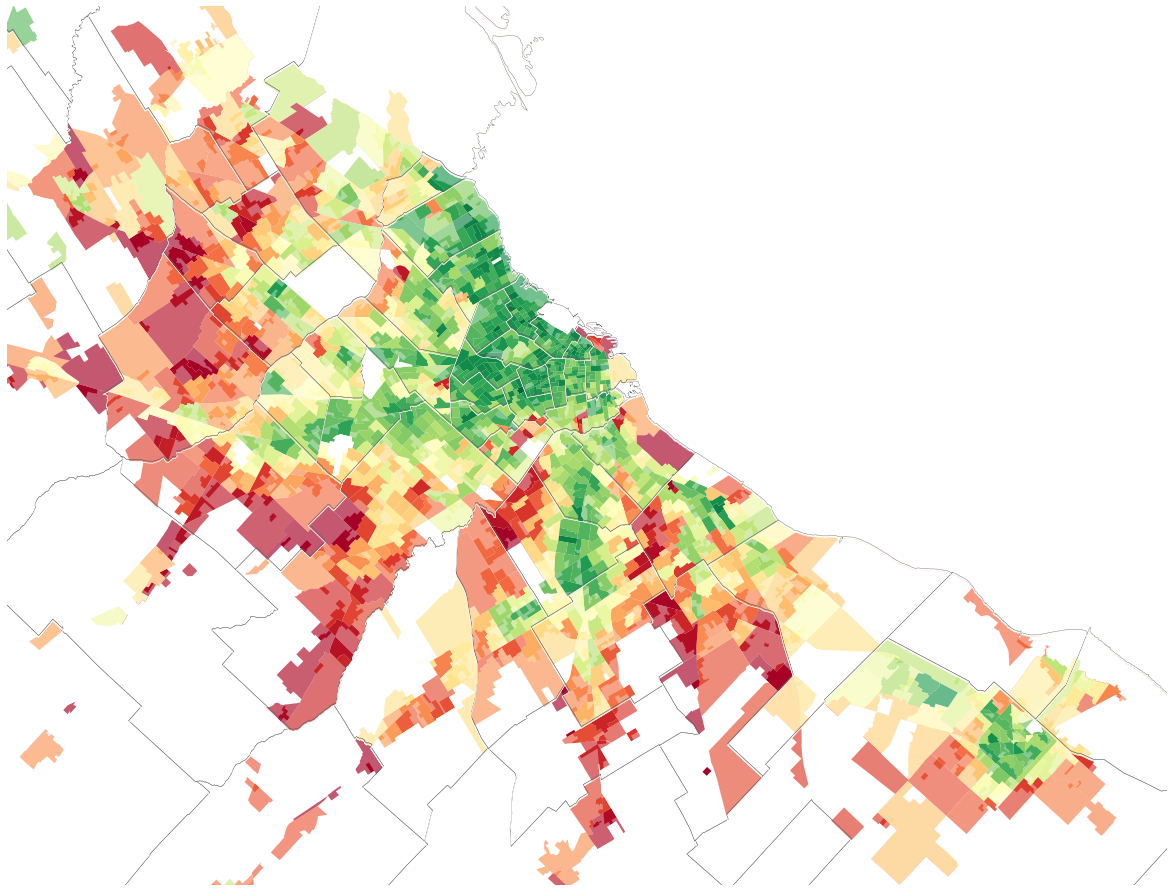

In [48]:
fig, ax = plt.subplots(1, figsize = (16.5, 12.5))

## Subset, Fracs cercanas a AGLO. (Agiliza mapeo)
aglo_center = Point(np.array([-6500000, -4095000]))
gdf['aglo_dist'] = gdf['centroid'].apply(lambda x: x.distance(aglo_center))
# gdf.groupby(['AGLOMERADO']).aglo_dist.describe().sort_values('mean')  #debug
gdf_aglo = gdf.loc[gdf.aglo_dist < 90000]

## Subset, DPTOS cercanos a AGLO. (Agiliza mapeo)    
bordes_dptos['aglo_dist'] = bordes_dptos.centroid.apply(lambda x: x.distance(aglo_center))
bordes_dptos_subset = bordes_dptos.loc[bordes_dptos.aglo_dist < 200000]
bordes_dptos_subset.translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
bordes_dptos_subset.translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

## plot bounds
w = 16.5; h = 12.5; sz = 4000
box = pd.DataFrame([- sz*w, - sz*h, sz*w, sz*h], index = ['minx', 'miny', 'maxx', 'maxy'], columns = ['AMBA']).T
bounds = (aglo_center.bounds + box).values[0]
x0, y0, x1, y1 = tuple(bounds)
ax.set_xlim(x0, x1); ax.set_ylim(y0, y1)
ax.axis('off')
    
## PLOT
gdf_aglo.fillna(0).plot(column = 'Pobreza_mean', ax = ax, vmin = 0, vmax = .6, cmap = 'RdYlGn_r', lw = 0)

ejido90.plot(color = 'w', ax = ax)
ejido60.plot(color = 'w', alpha = .35, ax = ax)

plt.tight_layout()
plt.savefig("./mapa_portada.png")
plt.show()

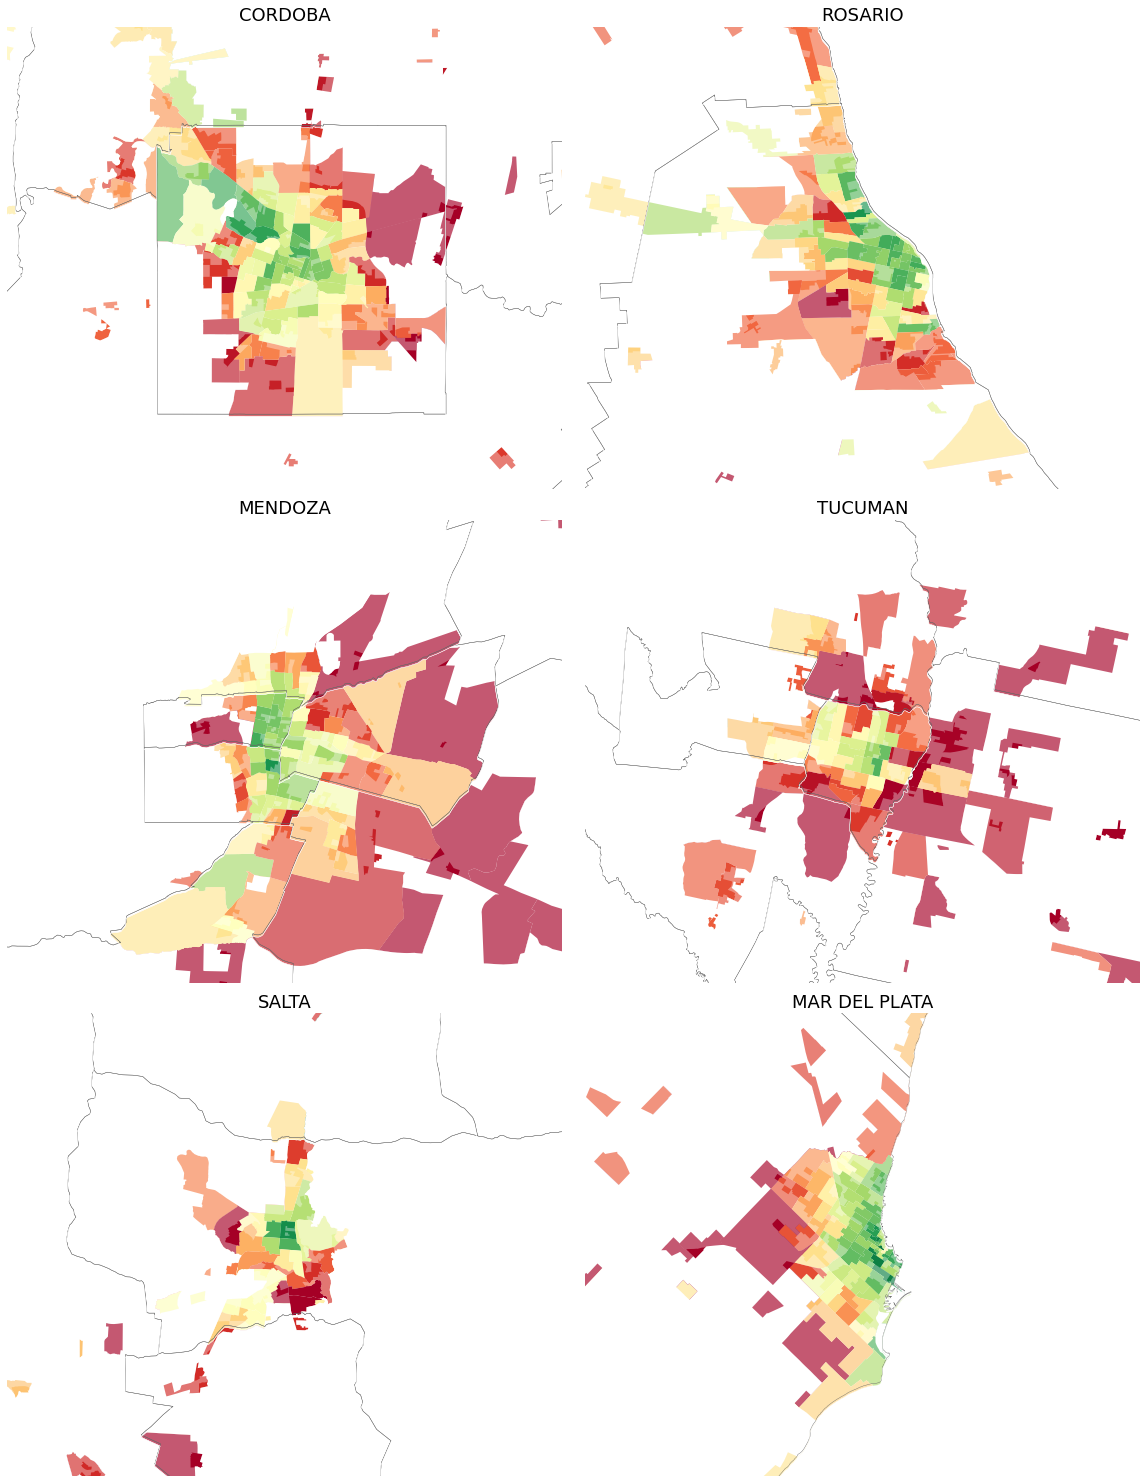

In [27]:
# # letter minus 1 inch = 6.5 x 9 in --> 3 in wide, 2.5 in high = 2x3 maps
#                                     --> 16.5*(2.5*3)/(3*2) == 20.62

fig, axs = plt.subplots(3, 2, figsize = (16.5, 20.7))

for i, aglo in enumerate([13, 4, 10, 29, 23, 34]):
    j = i//2; k = i % 2
    ax = axs[j][k]
    nomaglo = ['Cordoba', 'Rosario', 'Mendoza', 'Tucuman', 'Salta', 'Mar del Plata'][i]
    ax.set_title(nomaglo.upper(), fontsize = 18)
    
    ## Bordes de Departamento (doble linea)
    provs = [[14], [82, 30], [50], [90], [66], [6]][i] #[cba, [sfe, er], mza, tucu, salta, ba]
    bordes_dptos_subset = bordes_dptos.loc[bordes_dptos.PROV.isin(provs)]
    bordes_dptos_subset.translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
    bordes_dptos_subset.translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

    ## Subset, Fracs cercanas a AGLO. (Agiliza mapeo)
    aglo_center = Point(np.median(np.array([[p.x, p.y] for p in gdf.loc[gdf.AGLOMERADO == aglo].centroid]), axis = 0))
    gdf['aglo_dist'] = gdf['centroid'].apply(lambda x: x.distance(aglo_center))
    # gdf.groupby(['AGLOMERADO']).aglo_dist.describe().sort_values('mean')  #debug
    gdf_aglo = gdf.loc[gdf.aglo_dist < 50000]

    ## plot bounds
    w = 3; h = 2.5; sz = 9000
    box = pd.DataFrame([- sz*w, - sz*h, sz*w, sz*h], index = ['minx', 'miny', 'maxx', 'maxy'], columns = [aglo]).T
    bounds = (aglo_center.bounds + box).values[0]
    x0, y0, x1, y1 = tuple(bounds)
    ax.set_xlim(x0, x1); ax.set_ylim(y0, y1)
    ax.axis('off')

    ## PLOT
    gdf_aglo.fillna(0).plot(column = 'Pobreza_mean', ax = ax, vmin = 0, vmax = .6, cmap = 'RdYlGn_r', lw = 0)

    ejido90.plot(color = 'w', ax = ax)
    ejido60.plot(color = 'w', alpha = .35, ax = ax)

plt.tight_layout()
plt.savefig("./mapas_2.png")
plt.show()

In [28]:
# data.groupby(['AGLOMERADO', 'NOMAGLO']).size().sort_values()

In [29]:
# x = gpd.read_file(admin1_f)
# x.sort_values('NAM')

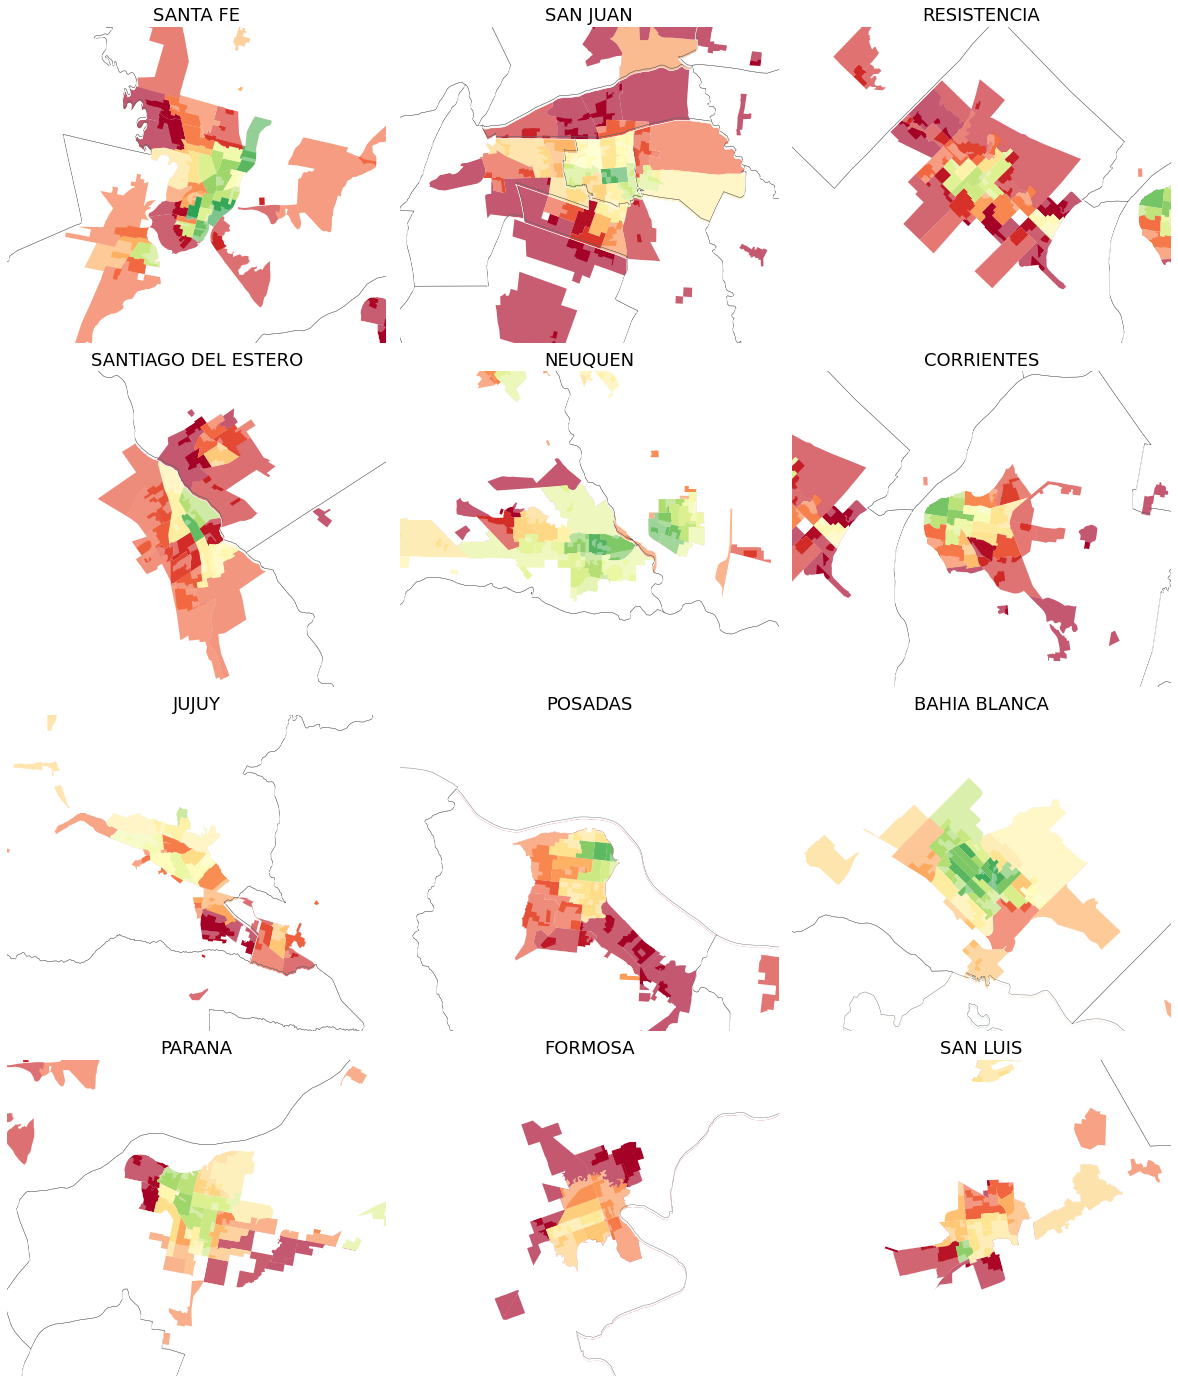

In [30]:
# # letter minus 1 inch = 6.5 x 9 in --> 2 in wide, 1.75 in high = 3x4 maps
#                                     --> 16.5*(1.75*4)/(2*3) == 19.25

fig, axs = plt.subplots(4, 3, figsize = (16.5, 19.3))

for i, aglo in enumerate([5, 27, 8, 18, 17, 12, 19, 7, 3, 6, 15, 26]):
    j = i//3; k = i % 3
    ax = axs[j][k]
    nomaglo = ['Santa Fe', 'San Juan', 'Resistencia', 'Santiago del Estero', 'Neuquen', 'Corrientes',
              'Jujuy', 'Posadas', 'Bahia Blanca', 'Parana', 'Formosa', 'San Luis'][i]
    ax.set_title(nomaglo.upper(), fontsize = 18)
    
    # Bordes de Departamento (doble linea)
    provs = [[82, 30], [70], [22,18], [86], [58, 62], [22, 18],
            [38], [54], [6], [82, 30], [34], [74]][i] 

    ## Subset, Fracs cercanas a AGLO. (Agiliza mapeo)
    aglo_center = Point(np.median(np.array([[p.x, p.y] for p in gdf.loc[gdf.AGLOMERADO == aglo].centroid]), axis = 0))
    gdf['aglo_dist'] = gdf['centroid'].apply(lambda x: x.distance(aglo_center))
    # gdf.groupby(['AGLOMERADO']).aglo_dist.describe().sort_values('mean')  #debug
    gdf_aglo = gdf.loc[gdf.aglo_dist < 50000]
    
    ## Subset, DPTOS cercanos a AGLO. (Agiliza mapeo)    
    bordes_dptos['aglo_dist'] = bordes_dptos.centroid.apply(lambda x: x.distance(aglo_center))
    bordes_dptos_subset = bordes_dptos.loc[bordes_dptos.aglo_dist < 200000]
#     bordes_dptos_subset = bordes_dptos.loc[bordes_dptos.PROV.isin(provs)]
    bordes_dptos_subset.translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
    bordes_dptos_subset.translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)
    

    ## plot bounds
    w = 3; h = 2.5; sz = 6000
    box = pd.DataFrame([- sz*w, - sz*h, sz*w, sz*h], index = ['minx', 'miny', 'maxx', 'maxy'], columns = [aglo]).T
    bounds = (aglo_center.bounds + box).values[0]
    x0, y0, x1, y1 = tuple(bounds)
    ax.set_xlim(x0, x1); ax.set_ylim(y0, y1)
    ax.axis('off')

    ## PLOT
    gdf_aglo.fillna(0).plot(column = 'Pobreza_mean', ax = ax, vmin = 0, vmax = .6, cmap = 'RdYlGn_r', lw = 0)

    ejido90.plot(color = 'w', ax = ax)
    ejido60.plot(color = 'w', alpha = .35, ax = ax)

plt.tight_layout()
plt.savefig("./mapas_3.png")
plt.show()

In [31]:
fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}

In [32]:
# gdf = gpd.read_file('./../data/geojson/pobreza_P_DPTO.geojson');# gdf = gdf.loc[gdf.PROV.isin(['02', '06'])]
# gdf.loc[gdf.Total_sum > gdf.Total_sum.quantile(.15)].plot()

In [33]:
sudamerica = gpd.read_file('./../data/info/sudamerica.geojson')
gdf_prov = gpd.read_file('./../data/geojson/pobreza_P_PROV.geojson');# gdf = gdf.loc[gdf.PROV.isin(['02', '06'])]
gdf_dpto = gpd.read_file('./../data/geojson/pobreza_P_DPTO.geojson');# gdf = gdf.loc[gdf.PROV.isin(['02', '06'])]

In [36]:
# # x = np.array([-8300000, -5750000])
# x = np.array([-.75e6, 1.25e6])
# np.round(x + 0.05*(x - x.mean()), -4)/1e6

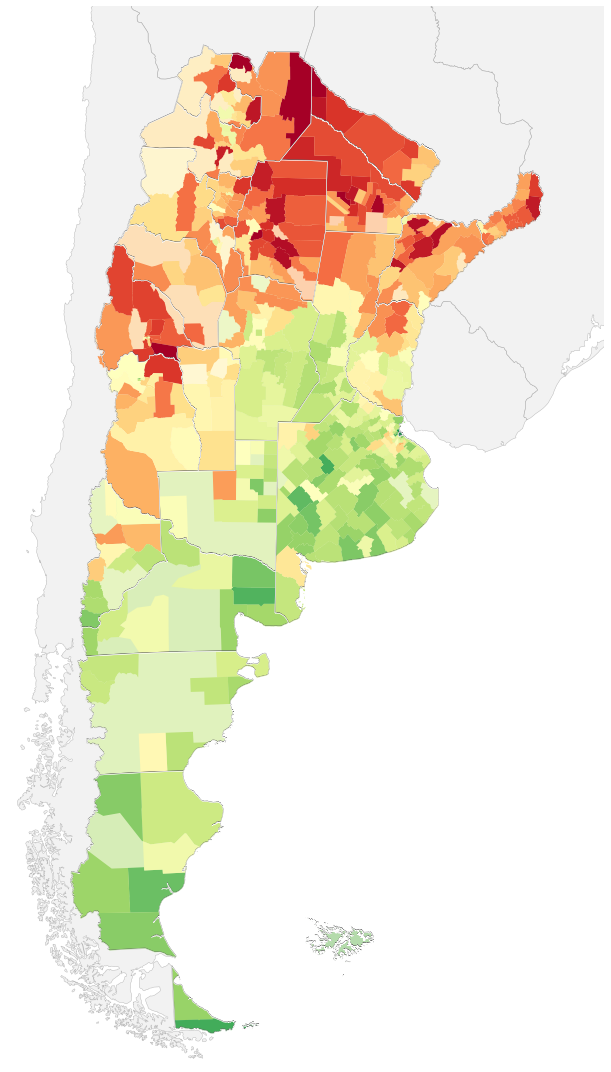

In [49]:

# Elegir crs
# crs = {'init': 'epsg:3395'}
crs = fancy_crs

fig, ax = plt.subplots(1, figsize = (10, 15))

## Continente (gris) fondo
sudamerica.loc[sudamerica.sov_a3 != 'ARG'].to_crs(crs).plot(color = '.9', alpha = .5, edgecolor = '.5', ax = ax, lw = .5)

## Pobreza PROVS (rellena DPTOS de baja poblacion)
gdf_prov.fillna(0).to_crs(crs).plot(column = 'Pobreza_mean', ax = ax, vmin = .1, vmax = .75, cmap = 'RdYlGn_r', lw = 0, alpha = .5)

## Pobreza deptos
gdf_dpto_ = gdf_dpto.loc[gdf_dpto.Total_sum > gdf_dpto.Total_sum.quantile(.15)]
gdf_dpto_.fillna(0).to_crs(crs).plot(column = 'Pobreza_mean', ax = ax, vmin = .1, vmax = .75, cmap = 'RdYlGn_r', lw = 0)

# Bordes provincias (doble linea)
admin1.to_crs(crs).translate(yoff = 2200, xoff = 300).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
admin1.to_crs(crs).translate().plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

# # Encuadre ARG
if crs == {'init': 'epsg:3395'}:
    ax.set_xlim(-8300000, -5750000)
    ax.set_ylim(-7450000, -2400000)
elif crs == fancy_crs:
    ax.set_xlim(-.85e6, 1.35e6)
    ax.set_ylim(-2.3e6, 1.6e6)

plt.axis('off')
plt.tight_layout()
plt.savefig("./mapas_ARG.png")
plt.show()

In [ ]:
xx

## Base: Personas, Mayores de 24.

In [ ]:
## PROVINCIAS

df = sintetizar_P(data.loc[data.P03 >= 24], ['PROV'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin1), crs = admin1.crs)

save_geojson(gdf, filename = 'pobreza_M24_PROV.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## DPTOS
df = sintetizar_P(data.loc[data.P03 >= 24], ['DPTO'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin210), crs = admin210.crs)

save_geojson(gdf, filename = 'pobreza_M24_DPTO.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## FRACS
data['IDFRAC'] = data['COD_2010'].str[:-2] + '00'
df = sintetizar_P(data.loc[data.P03 >= 24], ['IDFRAC'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()

df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin310), crs = admin310.crs)

save_geojson(gdf, filename = 'pobreza_M24_FRAC.geojson')

## Base: Personas, Menores de 14.

In [ ]:
## PROVINCIAS

df = sintetizar_P(data.loc[data.P03 <= 14], ['PROV'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin1), crs = admin1.crs)

save_geojson(gdf, filename = 'pobreza_M14_PROV.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## DPTOS
df = sintetizar_P(data.loc[data.P03 <= 14], ['DPTO'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin210), crs = admin210.crs)

save_geojson(gdf, filename = 'pobreza_M14_DPTO.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## FRACS
data['IDFRAC'] = data['COD_2010'].str[:-2] + '00'
df = sintetizar_P(data.loc[data.P03 <= 14], ['IDFRAC'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()

df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin310), crs = admin310.crs)

save_geojson(gdf, filename = 'pobreza_M14_FRAC.geojson')

## Base: Personas, Menores de 6.

In [ ]:
## PROVINCIAS

df = sintetizar_P(data.loc[data.P03 <= 6], ['PROV'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin1), crs = admin1.crs)

save_geojson(gdf, filename = 'pobreza_M6_PROV.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## DPTOS
df = sintetizar_P(data.loc[data.P03 <= 6], ['DPTO'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin210), crs = admin210.crs)

save_geojson(gdf, filename = 'pobreza_M6_DPTO.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## FRACS
data['IDFRAC'] = data['COD_2010'].str[:-2] + '00'
df = sintetizar_P(data.loc[data.P03 <= 6], ['IDFRAC'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()

df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin310), crs = admin310.crs)

save_geojson(gdf, filename = 'pobreza_M6_FRAC.geojson')

## Base: Hogares

In [ ]:
## PROVINCIAS

df = sintetizar_H(data, ['PROV'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin1), crs = admin1.crs)

save_geojson(gdf, filename = 'pobreza_H_PROV.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## DPTOS
df = sintetizar_H(data, ['DPTO'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()
df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin210), crs = admin210.crs)

save_geojson(gdf, filename = 'pobreza_H_DPTO.geojson')

In [ ]:
gdf.head(1)

In [ ]:
## FRACS
data['IDFRAC'] = data['COD_2010'].str[:-2] + '00'
df = sintetizar_H(data, ['IDFRAC'], frac = 0.02).drop('timestamp', axis = 1)#.groupby(['observable','sintetico','base']).size()

df = df.set_index(list(df.drop('valor', 1).columns)).unstack([0, 1])['valor']
df.columns = ['_'.join(col) for col in df.columns.values]
df = df.reset_index()

gdf = gpd.GeoDataFrame(df.merge(admin310), crs = admin310.crs)

save_geojson(gdf, filename = 'pobreza_H_FRAC.geojson')

In [ ]:
xx

## Comandos Mapbox CLI

In [ ]:
## Repetir para Hogares, para M24, M14, etc.

## Atenti, mandarlo a disco duro, no a drive

In [ ]:
cd /media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data
export MAPBOX_ACCESS_TOKEN=sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMyIiwiYSI6ImNrb3lvMWZyajAxZncycG8ycnJkaTI1ZjYifQ.LXJGImmBgQtWWrNOC1wTcA

In [ ]:
tilesets delete-source -f matuteiglesias2 income_provs_H
tilesets delete-source -f matuteiglesias2 income_dptos_H
tilesets delete-source -f matuteiglesias2 income_fracs_H

tilesets delete -f matuteiglesias2.income_H

## HOGARES. 
# (REPEAT FOR PERSONAS, M24, ETC.)
tilesets upload-source matuteiglesias2 income_provs_H ./geojson/pobreza_H_PROV.geojson
tilesets upload-source matuteiglesias2 income_dptos_H ./geojson/pobreza_H_DPTO.geojson
tilesets upload-source matuteiglesias2 income_fracs_H ./geojson/pobreza_H_FRAC.geojson

# # tilesets create username.hello-world-tiles --recipe hello-world-recipe.json --name "hello world"
tilesets create matuteiglesias2.income_H202209 --recipe ./geojson/pobreza_H-recipe.json --name "Ingresos y Pobreza - Hogares"
tilesets publish matuteiglesias2.income_H202209


In [ ]:
tilesets delete-source -f matuteiglesias2 income_provs_P
tilesets delete-source -f matuteiglesias2 income_dptos_P
tilesets delete-source -f matuteiglesias2 income_fracs_P

tilesets delete -f matuteiglesias2.income_P

## REPEAT FOR PERSONAS
tilesets upload-source matuteiglesias2 income_provs_P ./geojson/pobreza_P_PROV.geojson
tilesets upload-source matuteiglesias2 income_dptos_P ./geojson/pobreza_P_DPTO.geojson
tilesets upload-source matuteiglesias2 income_fracs_P ./geojson/pobreza_P_FRAC.geojson

tilesets create matuteiglesias2.income_P202209 --recipe ./geojson/pobreza_P-recipe.json --name "Ingresos y Pobreza - Personas"
tilesets publish matuteiglesias2.income_P202209


In [ ]:
tilesets delete-source -f matuteiglesias2 income_provs_M24
tilesets delete-source -f matuteiglesias2 income_dptos_M24
tilesets delete-source -f matuteiglesias2 income_fracs_M24

tilesets delete -f matuteiglesias2.income_M24

## REPEAT FOR Mayores de 24

tilesets upload-source matuteiglesias2 income_provs_M24 ./geojson/pobreza_M24_PROV.geojson
tilesets upload-source matuteiglesias2 income_dptos_M24 ./geojson/pobreza_M24_DPTO.geojson
tilesets upload-source matuteiglesias2 income_fracs_M24 ./geojson/pobreza_M24_FRAC.geojson

tilesets create matuteiglesias2.income_M24202209 --recipe ./geojson/pobreza_M24-recipe.json --name "Ingresos y Pobreza - Mayores de 24"
tilesets publish matuteiglesias2.income_M24202209


In [ ]:
tilesets delete-source -f matuteiglesias2 income_provs_M14
tilesets delete-source -f matuteiglesias2 income_dptos_M14
tilesets delete-source -f matuteiglesias2 income_fracs_M14

tilesets delete -f matuteiglesias2.income_M14

## REPEAT FOR Menores de 14
tilesets upload-source matuteiglesias2 income_provs_M14 ./geojson/pobreza_M14_PROV.geojson
tilesets upload-source matuteiglesias2 income_dptos_M14 ./geojson/pobreza_M14_DPTO.geojson
tilesets upload-source matuteiglesias2 income_fracs_M14 ./geojson/pobreza_M14_FRAC.geojson

tilesets create matuteiglesias2.income_M14202209 --recipe ./geojson/pobreza_M14-recipe.json --name "Ingresos y Pobreza - Menores de 14"
tilesets publish matuteiglesias2.income_M14202209


In [ ]:
tilesets delete-source -f matuteiglesias2 income_provs_M6
tilesets delete-source -f matuteiglesias2 income_dptos_M6
tilesets delete-source -f matuteiglesias2 income_fracs_M6

tilesets delete -f matuteiglesias2.income_M6

## REPEAT FOR Menores de 6
tilesets upload-source matuteiglesias2 income_provs_M6 ./geojson/pobreza_M6_PROV.geojson
tilesets upload-source matuteiglesias2 income_dptos_M6 ./geojson/pobreza_M6_DPTO.geojson
tilesets upload-source matuteiglesias2 income_fracs_M6 ./geojson/pobreza_M6_FRAC.geojson

tilesets create matuteiglesias2.income_M6202209 --recipe ./geojson/pobreza_M6-recipe.json --name "Ingresos y Pobreza - Menores de 6"
tilesets publish matuteiglesias2.income_M6202209


In [ ]:

# # tilesets upload-source username populated-places-source /path/to/data/populated_places.geojson.ld

# tilesets upload-source matuteiglesias2 income_provs ./geojson/pobreza_P_PROV.geojson
# tilesets upload-source matuteiglesias2 income_dptos ./geojson/pobreza_P_DPTO.geojson
# tilesets upload-source matuteiglesias2 income_fracs ./geojson/pobreza_P_FRAC.geojson


# tilesets delete-source matuteiglesias2 s


In [ ]:
# gdf = gpd.read_file('./../data/geojson/pobreza_H_PROV.geojson')
# gdf

In [ ]:
# export MAPBOX_ACCESS_TOKEN=sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMyIiwiYSI6ImNrb3lvMWZyajAxZncycG8ycnJkaTI1ZjYifQ.LXJGImmBgQtWWrNOC1wTcA

# # tilesets upload-source username populated-places-source /path/to/data/populated_places.geojson.ld
# cd /media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data

# tilesets upload-source matuteiglesias2 pobreza_v2 ./geojson/pobreza_P_PROV.geojson
# tilesets upload-source matuteiglesias2 pobreza_v2 ./geojson/pobreza_P_DPTO.geojson

# # tilesets create username.hello-world-tiles --recipe hello-world-recipe.json --name "hello world"
# tilesets create matuteiglesias2.personas2 --recipe ./geojson/pobreza-recipe.json --name "Ingresos y Pobreza - Personas2"
# tilesets publish matuteiglesias2.personas2


In [ ]:
>>> import seaborn as sns
>>> pal = sns.color_palette("RdYlGn_r", 10)
>>> print(pal.as_hex())


In [ ]:
>>> import seaborn as sns
>>> pal = sns.color_palette("cool", 10)
>>> print(pal.as_hex())